In [1]:
import scipy.stats
import numpy
import statistics
import random 
import pandas as pd
import numpy as np 


import matplotlib.pyplot as plt

In [2]:
def Random_FCFS_corr_V(N, servicerate_1, arrival_rate_1,  servicerate_2,arrival_rate_2, gamma, termination):
    # Setting paramters
    Queue = 0 
    Queue_name = []
    TNOW = 0
    Q_num = 0
    free_servers = []
    Abandon = 0
    Abandon_1 = 0
    Abandon_2 = 0 
    N_served = 0
    N_served_1 = 0
    N_served_2 = 0
    # Total numbef of people in a system for any given time 
    TotalP= 0
    AreaP = 0
    AreaQ_rate = 0
    AreaQ = 0
    
    # Overall people enter the system
    Total = 0
    
    # PLotting Parameters for experiment 
    Waiting_number_Served = 0
    Waiting_number_Left = 0
    Waiting_Time_Left = 0
    Waiting_Time_Served = 0

    Waiting_Time_Left_1 = 0
    Waiting_Time_Served_1 = 0


    Waiting_number_Served_1 = 0
    Waiting_number_Served_2 = 0
    
    Waiting_Time_Left_2 = 0
    Waiting_Time_Served_2 = 0
    
     # Waiting time performance measure 
    Arrival_times = {}
    
    
    # Setting up the event Calendar 
    col_name = ["Arrival_1", "Arrival_2", "Termination"]

    for i in range(0, N): 
        col_name += ["Server_"+str(i)]
        free_servers += ["Server_"+str(i)]        

    
    # Initializing the event calendar 
    event_calendar = { c : termination+1 for c in col_name}
    event_calendar["Arrival_1"] = random.expovariate(arrival_rate_1)
    event_calendar["Arrival_2"] = random.expovariate(arrival_rate_2)
    event_calendar["Termination"] = termination
    

    # Initialize Record keeping of utilization rates 
    Total_Utilization =  { s : 0 for s in free_servers}
    Utilization_1 =  { s : 0 for s in free_servers}
    Utilization_2 =  { s : 0 for s in free_servers}
    
    while TNOW < termination:      
        TLast = TNOW
        Next_Event = min(event_calendar.keys(), key = (lambda k: event_calendar[k]))
        TNOW = event_calendar[Next_Event]
        
        if TNOW >= termination: 
            AreaQ += Queue*(termination - TLast)
            AreaP += TotalP*(termination - TLast)
            if TotalP >  0:
                AreaQ_rate += (Queue/TotalP)*(termination - TLast)
        else:
            AreaQ += Queue*(TNOW - TLast)
            AreaP += TotalP*(TNOW - TLast)
            if TotalP >  0:
                AreaQ_rate += (Queue/TotalP)*(TNOW - TLast)
            

        if (Next_Event).startswith("Arrival") == True:
            TotalP += 1
            Total +=1
            if Next_Event == "Arrival_1":
                event_calendar["Arrival_1"] += random.expovariate(arrival_rate_1)
            else:
                event_calendar["Arrival_2"] += random.expovariate(arrival_rate_2)
            
            # Assign a queue to check if servers are free
            if free_servers == []:
                Queue += 1
                Q_num += 1
                
                if Next_Event == "Arrival_1":
                    Queue_name.append(str(Q_num)+ "_1")
                    event_calendar["Departure_" + str(Q_num)+ "_1"] = TNOW + random.expovariate(gamma)
                    Arrival_times[str(Q_num)+ "_1"] = TNOW
                else:
                    Queue_name.append(str(Q_num)+ "_2")
                    event_calendar["Departure_" + str(Q_num)+ "_2"] = TNOW + random.expovariate(gamma)
                    Arrival_times[str(Q_num)+ "_2"] = TNOW   
                
            else:
                s = random.choice(free_servers)
                free_servers.remove(s)
                N_served += 1 
                
                # Split the stats
                if Next_Event == "Arrival_1":
                    N_served_1 +=1
                    event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                    if TNOW < termination:
                        if event_calendar[s] < termination:
                            Utilization_1[s] += event_calendar[s] - TNOW      
                        else:
                            Utilization_1[s] += termination - TNOW
                else:
                    N_served_2 +=1
                    event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                    if event_calendar[s] < termination:
                            Utilization_2[s] += event_calendar[s] - TNOW      
                    else:
                            Utilization_2[s] += termination - TNOW
                                   
               
                # Only schedule the next service if TNOW < termination
                if TNOW < termination:
                    if event_calendar[s] < termination:
                        Total_Utilization[s] += event_calendar[s] - TNOW      
                    else:
                        Total_Utilization[s] += termination - TNOW
                        
                        
                
        elif (Next_Event).startswith("Server") == True:
            TotalP -= 1
            ## Reset the value for the corresponding agent that is now free 
            event_calendar[Next_Event] = termination + 1 
            free_servers.append(Next_Event)
            
             # Schedule the next service time once a server is available 
            if Queue > 0 and free_servers != []:
                s = random.choice(free_servers)
                N_served +=1 
                Queue -= 1 
                free_servers.remove(s)
                if Queue_name[0].endswith("1"):
                    event_calendar[s] = TNOW + random.expovariate(servicerate_1[s])
                else:
                    event_calendar[s] = TNOW + random.expovariate(servicerate_2[s])
                
                # First come first serve basis
                ## Make sure this is editing as required
                del event_calendar["Departure_" + Queue_name[0]]
                
                
                # Splitting the results per product for analysis 
                if Queue_name[0].endswith("_1") == True:
                    N_served_1 +=1
                    Waiting_number_Served_1 += 1 
                    if TNOW < termination:
                        Waiting_Time_Served_1 += TNOW - Arrival_times[Queue_name[0]]
                        if event_calendar[s] < termination:
                            Utilization_1[s] += event_calendar[s] - TNOW   
                        else:
                            Utilization_1[s] += termination - TNOW  
                    else:
                        Waiting_Time_Served_1 +=  termination - Arrival_times[Queue_name[0]]
                    
                else:
                    N_served_2 +=1
                    Waiting_number_Served_2 += 1 
                    if TNOW < termination:
                        Waiting_Time_Served_2 += TNOW - Arrival_times[Queue_name[0]]
                        if event_calendar[s] < termination:
                            Utilization_2[s] += event_calendar[s] - TNOW   
                        else:
                            Utilization_2[s] += termination - TNOW  
                    else:
                        Waiting_Time_Served_2 +=  termination - Arrival_times[Queue_name[0]]
                    
                
                # Overall Stats    
                if TNOW < termination:
                    Waiting_Time_Served += TNOW - Arrival_times[Queue_name[0]]
                    
                    if event_calendar[s] < termination:
                        Total_Utilization[s] += event_calendar[s] - TNOW   
                    else:
                        Total_Utilization[s] += termination - TNOW  
                else:
                    Waiting_Time_Served +=  termination - Arrival_times[Queue_name[0]]
                    
                    
                Waiting_number_Served += 1 
                del Arrival_times[Queue_name[0]]
                Queue_name.remove(Queue_name[0])
                
    
        if (Next_Event).startswith("Departure") == True:
            Abandon += 1 
            Queue -= 1
            TotalP -= 1
            
            if Next_Event.endswith("_1") == True:
                Abandon_1 +=1
                if TNOW < termination:
                    Waiting_Time_Left_1 += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]
                else:
                    Waiting_Time_Left_1 += termination - Arrival_times[Next_Event[Next_Event.index("u")+4:]]  
            else:
                Abandon_2 +=1
                if TNOW < termination:
                    Waiting_Time_Left_2 += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]
                else:
                    Waiting_Time_Left_2 += termination - Arrival_times[Next_Event[Next_Event.index("u")+4:]]  
                
            
            if TNOW < termination:
                Waiting_Time_Left += TNOW - Arrival_times[Next_Event[Next_Event.index("u")+4:]]
            else:
                Waiting_Time_Left += termination - Arrival_times[Next_Event[Next_Event.index("u")+4:]]          
            
            ## Remove entry,no need to record NEED TPO APPEND APPLY THE SAME 
            Waiting_number_Left += 1 
            del event_calendar[Next_Event]
            Queue_name.remove(Next_Event[Next_Event.index("u")+4:])
            del Arrival_times[Next_Event[Next_Event.index("u")+4:]]
            
        
    val = 0
    for k in Total_Utilization:
        val +=  Total_Utilization[k]
    avg_u = val/len(Total_Utilization)/termination
      
    val = 0
    for k in Utilization_1:
        val +=  Utilization_1[k]
    avg_u_1 = val/len(Utilization_1)/termination
        
        
    val = 0
    for k in Utilization_2:
        val +=  Utilization_2[k]
        avg_u_2 = val/len(Utilization_2)/termination
        
    if Abandon == 0:
        Wait_A =  Waiting_Time_Left/1
    else:
        Wait_A =  Waiting_Time_Left/Abandon
    
    if Abandon_1 == 0:
        Wait_A_1 =  Waiting_Time_Left_1/1
    else:
        Wait_A_1 =  Waiting_Time_Left_1/Abandon_1
    
    if Abandon_2 == 0:
        Wait_A_2 =  Waiting_Time_Left_2/1
    else:
        Wait_A_2 =  Waiting_Time_Left/Abandon
        
        
        
    Avg_serv_rate_1=0
    for i in servicerate_1:
        Avg_serv_rate_1 += servicerate_1[i]
    Avg_serv_rate_1 = Avg_serv_rate_1/len(servicerate_1)
    
    
    Avg_serv_rate_2=0
    for i in servicerate_2:
        Avg_serv_rate_2 += servicerate_2[i]
    Avg_serv_rate_2 = Avg_serv_rate_2/len(servicerate_2)
        
    return Abandon, Q_num, Wait_A , Waiting_Time_Served/N_served, N_served,  avg_u, AreaQ/termination, AreaP/termination, AreaQ_rate/termination, Total, Total_Utilization, Utilization_1,  Utilization_2, Abandon_1, Abandon_2, N_served_1, N_served_2, Wait_A_1, Wait_A_2, Waiting_Time_Served_1/N_served_1, Waiting_Time_Served_2/N_served_2, avg_u_1,avg_u_2, Avg_serv_rate_1, Avg_serv_rate_2

In [3]:
def Edit_Entry(x):
    new_entry = {}
    new_entry.update( Served = x[4])
    new_entry.update( Served_1 = x[15])
    new_entry.update( Served_2 = x[16])
    new_entry.update( Abandoned = x[0])
    new_entry.update( Abandoned_1 = x[13])
    new_entry.update( Abandoned_2 = x[14])
    
    new_entry.update( Waited = x[1])
    new_entry.update( Waiting_Time_S = x[3])
    new_entry.update( Waiting_Time_A = x[2])
    new_entry.update( Utilization = x[5])
    new_entry.update( Avg_Queue = x[6])
    new_entry.update( Queue_Fraction = x[8])
    new_entry.update( Avg_People = x[7])

    new_entry.update( Waiting_Time_S_1 = x[19])
    new_entry.update( Waiting_Time_A_1 = x[17])
    new_entry.update( Utilization_1 = x[-4])
    new_entry.update( Waiting_Time_S_2 = x[20])
    new_entry.update( Waiting_Time_A_2 = x[18])
    new_entry.update( Utilization_2 = x[-3])
    new_entry.update( Avg_ser_rat_2 = x[-1])
    new_entry.update( Avg_ser_rat_1 = x[-2])
    
    return new_entry

In [18]:
a = numpy.zeros(2)
for i in range(0,2):
    a[i] = 0
    
A = numpy.zeros(shape=(2,2))
A_2 = numpy.zeros(shape=(2,2))
A_3 = numpy.zeros(shape=(2,2))
A_4 = numpy.zeros(shape=(2,2))
A_0 = numpy.zeros(shape=(2,2))

for i in range(0,2):
    for j in range(0,2):
            A_0[i][j] = 0
            A[i][j] = 0.817
            A_2[i][j] = 0.42
            A_3[i][j] = -0.817
            A_4[i][j] = -0.42
            
for i in range(0,2):
    A[i][i] = 1 
    A_0[i][i] = 1
    A_2[i][i] = 1
    A_3[i][i] = 1
    A_4[i][i] = 1

In [19]:
def generate_sr(A_, a):
    servicerate_1 = {}
    servicerate_2 = {}
    
    rates = 2*scipy.stats.norm.cdf(numpy.random.multivariate_normal(a, A_, 100))
    
    x = []
    y = []

    for i in range(len(rates)):
        x.append(rates[i][0])
        y.append(rates[i][1])

    corr = np.corrcoef(x, y)
    
    for i in range(0, 100):
        servicerate_1["Server_"+str(i)] = rates[i][0]
        servicerate_2["Server_"+str(i)] = rates[i][1]
    
    return servicerate_1, servicerate_2, corr
    

In [22]:
V_indep = pd.DataFrame()
V_corr = pd.DataFrame()
V_corr_3 = pd.DataFrame()


for i in range(0,20):
    
    servicerate_1 = {}
    servicerate_2 = {}
    
    for i in range(0, 100):
        servicerate_1["Server_"+str(i)] = random.uniform(0,2)
        servicerate_2["Server_"+str(i)] = random.uniform(0,2)

    x = Random_FCFS_corr_V(100, servicerate_1, 50,servicerate_2, 50, 0.5, 40000)
    new_entry = Edit_Entry(x)
    V_indep = V_indep.append(new_entry, ignore_index = True) 
        
    high_corr = generate_sr(A, a)
    
    y = Random_FCFS_corr_V(100, high_corr[0], 50,high_corr[1], 50, 0.5, 40000)
    new_entry = Edit_Entry(y)
    new_entry.update(corr = high_corr[2])
    V_corr = V_corr.append(new_entry, ignore_index = True)
    
    negative_corr = generate_sr(A_3, a)
    
    y_3 = Random_FCFS_corr_V(100,negative_corr[0], 50,negative_corr[1], 50, 0.5, 40000)
    new_entry = Edit_Entry(y_3)
    new_entry.update(corr = negative_corr[2])
    V_corr_3 = V_corr_3.append(new_entry, ignore_index = True)



In [ ]:
V_indep["Correlation"] = 0

V_corr["Correlation"]= V_corr["corr"][i][0][1]
V_corr_3["Correlation"] = V_corr_3["corr"][i][0][1]
for i in range(0,20):
    V_corr["Correlation"][i] = V_corr["corr"][i][0][1]
    V_corr_3["Correlation"][i] = V_corr_3["corr"][i][0][1]

In [90]:
compare = [V_indep, V_corr_3, V_corr]
col_name = ["Measure","Mean", "Variance", "Type"]
T = ["Independent", "High Positive Correlation",  "High Negative Correlation"]
Corr_V = pd.DataFrame (columns = col_name)
new_entry = { c : 0 for c in col_name}
b = 0
for c in compare:
    for key in ['Abandoned',  'Avg_People', 'Avg_Queue', 'Served',  'Waited','Utilization',
       'Waiting_Time_A',
       'Waiting_Time_S']:
        new_entry.update( Type = T[b])
        new_entry.update( Measure = key)
        new_entry.update( Mean = c[key].mean())
        new_entry.update( Variance =  statistics.variance((c[key])))
        intervl = scipy.stats.t.ppf(q=.975,df=19)*np.sqrt(statistics.variance(c[key]))/np.sqrt(20)
        new_entry.update( ConfidenceInterval = "("+str(round(c[key].mean() - intervl, 5))+ ","+ str(round(c[key].mean() + intervl, 5))+")")
        Corr_V = Corr_V.append(new_entry, ignore_index = True)
    b+=1

In [92]:
Corr_V.sort_values(["Measure","Type"])

,Measure,Mean,Variance,Type,ConfidenceInterval
16,Abandoned,2.563387e+05,1.575669e+10,High Negative Correlation,"(197590.89028,315086.50972)"
8,Abandoned,1.210410e+06,2.706523e+10,High Positive Correlation,"(1133414.29865,1287405.20135)"
0,Abandoned,6.426114e+05,2.792618e+10,Independent,"(564400.9646,720821.9354)"
17,Avg_People,1.113158e+02,5.191099e+01,High Negative Correlation,"(107.94381,114.68783)"
9,Avg_People,1.605187e+02,6.757891e+01,High Positive Correlation,"(156.67135,164.3661)"
1,Avg_People,1.320353e+02,7.145941e+01,Independent,"(128.07901,135.9916)"
18,Avg_Queue,1.282214e+01,3.923735e+01,High Negative Correlation,"(9.89051,15.75377)"
10,Avg_Queue,6.052090e+01,6.757635e+01,High Positive Correlation,"(56.6736,64.36821)"
2,Avg_Queue,3.213244e+01,6.989352e+01,Independent,"(28.21973,36.04515)"
19,Served,3.743597e+06,1.573469e+10,High Negative Correlation,"(3684890.4195,3802303.9805)"


In [84]:
compare = [V_indep, V_corr_3, V_corr]
T = ["Independent", "High Negative Correlation",  "High Positive Correlation"]

V_ALL = pd.DataFrame()
b =0
for i in compare:
    i["Routing"] = T[b]
    V_ALL = V_ALL.append(i,ignore_index = True)
    b+=1

Text(0, 0.5, 'Served')

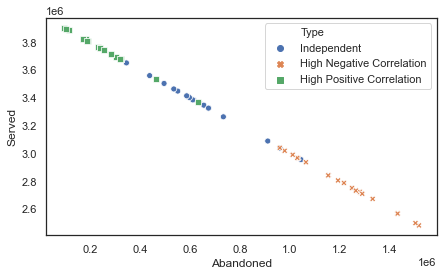

In [107]:
import seaborn as sns
sns.set(rc={"figure.figsize": (7, 4)})
sns.set_style("white")
ax = sns.scatterplot(x="Abandoned", y="Served",
                     hue="Type", style="Type", data = V_ALL)

plt.xlabel("Abandoned", size=12)
plt.ylabel("Served", size=12)


Text(0, 0.5, 'Correlation')

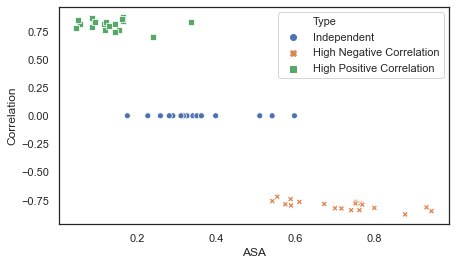

In [108]:
import seaborn as sns
sns.set(rc={"figure.figsize": (7, 4)})
sns.set_style("white")
ax = sns.scatterplot(x="Waiting_Time_S", y="Correlation",
                     hue="Type", style="Type", data = V_ALL)


plt.xlabel("ASA", size=12)
plt.ylabel("Correlation", size=12)